##### <b>Load Libraries</b>

In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from io import StringIO
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

from sklearn.cluster import KMeans
from prettytable import PrettyTable
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score



##### <b>Load data raw</b>

In [2]:
df = pd.read_csv("./sources/Airline_Delay_Cause.csv")


##### <b>Tampilkan data raw</b>

In [3]:
df

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### <b> Tampilkan data yang pada kolomnya tidak terdapat nilai</b>

In [4]:
df_null = df[df.isna().any(axis=1)]

##### <b> Tampilkan data yang pada kolomnya tidak terdapat nilai</b>

In [5]:
df_null

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1300,2019,12,OO,SkyWest Airlines Inc.,MLB,"Melbourne, FL: Melbourne Orlando International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4024,2019,10,DL,Delta Air Lines Inc.,PSC,"Pasco/Kennewick/Richland, WA: Tri Cities",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6199,2019,9,DL,Delta Air Lines Inc.,TVC,"Traverse City, MI: Cherry Capital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6208,2019,9,EV,ExpressJet Airlines LLC,AVL,"Asheville, NC: Asheville Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6232,2019,9,EV,ExpressJet Airlines LLC,ERI,"Erie, PA: Erie International/Tom Ridge Field",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79745,2014,12,DL,Delta Air Lines Inc.,TVC,"Traverse City, MI: Cherry Capital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79936,2014,12,EV,ExpressJet Airlines Inc.,MCN,"Macon, GA: Middle Georgia Regional",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80001,2014,12,F9,Frontier Airlines Inc.,PIT,"Pittsburgh, PA: Pittsburgh International",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80002,2014,12,F9,Frontier Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### <b> Hilangkan data yang pada kolomnya tidak terdapat nilai</b>

In [6]:
df_1 = df.dropna(axis=0, how='any', inplace=False)

##### <b> Tampilkan data yang setiap kolomnya memiliki nilai</b>

In [7]:
df_1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### <b> Hapus data duplikat</b>

In [8]:
df_1 = df_1[~df_1.duplicated(keep=False)]

##### <b> Tampilkan data yang telah melalui proses cleaning</b>

In [9]:
df_1

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",53.0,6.0,3.05,0.22,0.21,0.00,2.52,0.0,0.0,265.0,110.0,10.0,6.0,0.0,139.0
1,2019,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",115.0,4.0,0.03,0.00,1.35,0.00,2.62,0.0,2.0,157.0,1.0,0.0,40.0,0.0,116.0
2,2019,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",191.0,13.0,7.49,2.31,1.48,0.00,1.73,0.0,1.0,678.0,332.0,153.0,82.0,0.0,111.0
3,2019,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",6.0,1.0,0.00,0.00,1.00,0.00,0.00,0.0,0.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2019,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",3802.0,468.0,115.80,11.79,148.86,0.45,191.11,3.0,0.0,32762.0,11503.0,608.0,4885.0,93.0,15673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80585,2014,12,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",151.0,56.0,26.18,2.39,4.96,0.00,22.47,3.0,1.0,2155.0,829.0,147.0,160.0,0.0,1019.0
80586,2014,12,WN,Southwest Airlines Co.,SJU,"San Juan, PR: Luis Munoz Marin International",354.0,67.0,22.42,1.00,9.45,0.00,34.14,0.0,0.0,3057.0,979.0,33.0,385.0,0.0,1660.0
80587,2014,12,WN,Southwest Airlines Co.,SLC,"Salt Lake City, UT: Salt Lake City International",807.0,323.0,135.76,0.98,33.75,1.15,151.35,3.0,0.0,14672.0,5356.0,26.0,1191.0,25.0,8074.0
80588,2014,12,EV,ExpressJet Airlines Inc.,PHX,"Phoenix, AZ: Phoenix Sky Harbor International",1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### <b> Dapatkan seluruh data carrier</b>

In [10]:
carriers = df_1[['carrier', 'carrier_name']].drop_duplicates()
carrier_codes, carrier_names = carriers.T.to_numpy()

##### <b> Tampilkan seluruh data carrier</b>

In [11]:
numbered_carriers = list(zip([x for x in range(1, (len(carriers) + 1))], carrier_codes, carrier_names))
pretty_carriers = PrettyTable(['No', 'Carrier', 'Carrier Name'])
for row in numbered_carriers:
    pretty_carriers.add_row(row)
pretty_carriers.align['Carrier'] = 'l'
pretty_carriers.align['Carrier Name'] = 'l'
print(pretty_carriers)

+----+---------+-----------------------------+
| No | Carrier | Carrier Name                |
+----+---------+-----------------------------+
| 1  | 9E      | Endeavor Air Inc.           |
| 2  | AA      | American Airlines Inc.      |
| 3  | AS      | Alaska Airlines Inc.        |
| 4  | B6      | JetBlue Airways             |
| 5  | DL      | Delta Air Lines Inc.        |
| 6  | EV      | ExpressJet Airlines LLC     |
| 7  | F9      | Frontier Airlines Inc.      |
| 8  | G4      | Allegiant Air               |
| 9  | HA      | Hawaiian Airlines Inc.      |
| 10 | MQ      | Envoy Air                   |
| 11 | NK      | Spirit Air Lines            |
| 12 | OH      | PSA Airlines Inc.           |
| 13 | OO      | SkyWest Airlines Inc.       |
| 14 | UA      | United Air Lines Inc.       |
| 15 | WN      | Southwest Airlines Co.      |
| 16 | YV      | Mesa Airlines Inc.          |
| 17 | YX      | Republic Airline            |
| 18 | EV      | ExpressJet Airlines Inc.    |
| 19 | VX    

##### <b> Dapatkan seluruh data airport</b>

In [12]:
airports = df_1[['airport', 'airport_name']].drop_duplicates()
airport_codes, airport_names = airports.T.to_numpy()

##### <b> Tampilkan seluruh data airport</b>

In [13]:
numbered_airports = list(zip([x for x in range(1, (len(airports) + 1))], airport_codes, airport_names))
pretty_airports = PrettyTable(['No', 'Airport', 'Airport Name'])
for row in numbered_airports:
    pretty_airports.add_row(row)
pretty_airports.align['Airport'] = 'l'
pretty_airports.align['Airport Name'] = 'l'
print(pretty_airports)

+-----+---------+------------------------------------------------------------------------+
|  No | Airport | Airport Name                                                           |
+-----+---------+------------------------------------------------------------------------+
|  1  | ABE     | Allentown/Bethlehem/Easton, PA: Lehigh Valley International            |
|  2  | AEX     | Alexandria, LA: Alexandria International                               |
|  3  | AGS     | Augusta, GA: Augusta Regional at Bush Field                            |
|  4  | ALB     | Albany, NY: Albany International                                       |
|  5  | ATL     | Atlanta, GA: Hartsfield-Jackson Atlanta International                  |
|  6  | ATW     | Appleton, WI: Appleton International                                   |
|  7  | AUS     | Austin, TX: Austin - Bergstrom International                           |
|  8  | AVL     | Asheville, NC: Asheville Regional                                      |

##### <b> Total number of flights</b>

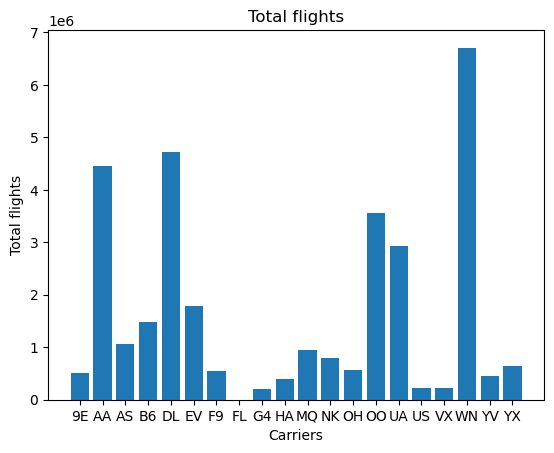

carrier
9E     503049.0
AA    4445810.0
AS    1059057.0
B6    1472567.0
DL    4729976.0
EV    1792224.0
F9     552360.0
FL       2940.0
G4     201526.0
HA     400033.0
MQ     948122.0
NK     793419.0
OH     567761.0
OO    3560782.0
UA    2933183.0
US     232890.0
VX     224667.0
WN    6708119.0
YV     443026.0
YX     645239.0
Name: arr_flights, dtype: float64


In [14]:
total_flights = df_1.groupby('carrier')['arr_flights'].sum()
fig, ax = plt.subplots()
ax.bar(total_flights.index, total_flights.values)

ax.set_ylabel('Total flights')
ax.set_xlabel('Carriers')
ax.set_title('Total flights')
plt.show()
print(total_flights)

##### <b> Total number of delayed flights</b>

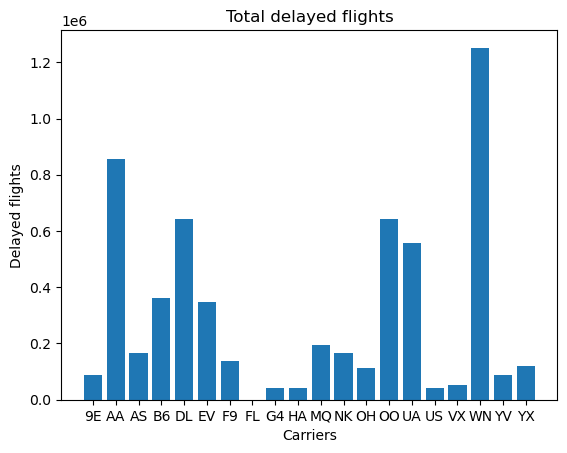

carrier
9E      88245.0
AA     855299.0
AS     165003.0
B6     361432.0
DL     641503.0
EV     346985.0
F9     136868.0
FL        359.0
G4      42772.0
HA      42814.0
MQ     193216.0
NK     166739.0
OH     111887.0
OO     643191.0
UA     557709.0
US      42738.0
VX      52277.0
WN    1251711.0
YV      89379.0
YX     118606.0
Name: arr_del15, dtype: float64


In [15]:
total_flights_del15 = df_1.groupby('carrier')['arr_del15'].sum()
fig, ax = plt.subplots()
ax.bar(total_flights_del15.index, total_flights_del15.values)

ax.set_ylabel('Delayed flights')
ax.set_xlabel('Carriers')
ax.set_title('Total delayed flights')
plt.show()
print(total_flights_del15)

##### <b> Total number of delayed times</b>

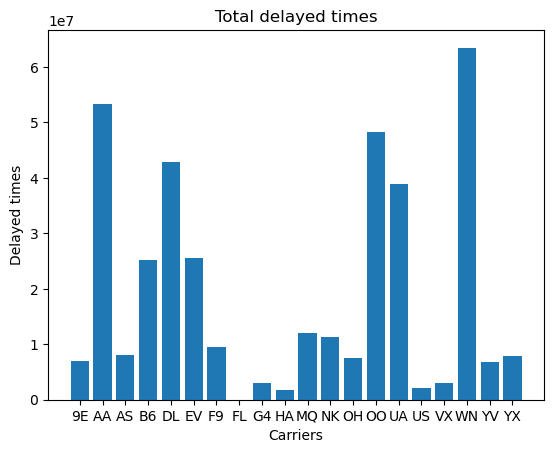

carrier
9E     6935209.0
AA    53404741.0
AS     8112679.0
B6    25231646.0
DL    42826931.0
EV    25476674.0
F9     9538551.0
FL       16204.0
G4     3071500.0
HA     1771055.0
MQ    12021901.0
NK    11336371.0
OH     7503016.0
OO    48184892.0
UA    38815450.0
US     2089026.0
VX     3040374.0
WN    63470780.0
YV     6880310.0
YX     7930619.0
Name: arr_delay, dtype: float64


In [16]:
total_delayed_times = df_1.groupby('carrier')['arr_delay'].sum()
fig, ax = plt.subplots()
ax.bar(total_delayed_times.index, total_delayed_times.values)

ax.set_ylabel('Delayed times')
ax.set_xlabel('Carriers')
ax.set_title('Total delayed times')
plt.show()
print(total_delayed_times)

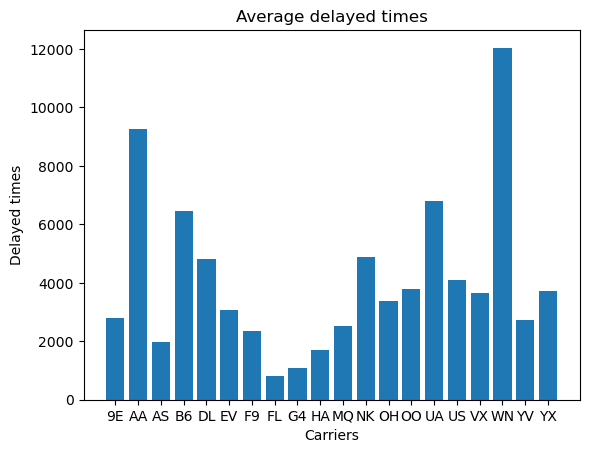

carrier
9E     2796.455242
AA     9252.380631
AS     1983.055243
B6     6443.219101
DL     4800.149182
EV     3055.489806
F9     2356.943662
FL      810.200000
G4     1083.039492
HA     1689.937977
MQ     2512.414002
NK     4886.366810
OH     3364.581166
OO     3784.847380
UA     6807.339530
US     4112.255906
VX     3636.811005
WN    12043.791271
YV     2735.709742
YX     3728.546780
Name: arr_delay, dtype: float64


In [17]:
avg_delayed_times = df_1.groupby('carrier')['arr_delay'].mean()
fig, ax = plt.subplots()
ax.bar(avg_delayed_times.index, avg_delayed_times.values)

ax.set_ylabel('Delayed times')
ax.set_xlabel('Carriers')
ax.set_title('Average delayed times')
plt.show()
print(avg_delayed_times)

##### <b> Tampilkan jumlah flights per year</b>

Total Fligths Per Year 

year
2014     477183.0
2015    5819076.0
2016    5617655.0
2017    5674615.0
2018    7206192.0
2019    7422029.0
Name: arr_flights, dtype: float64


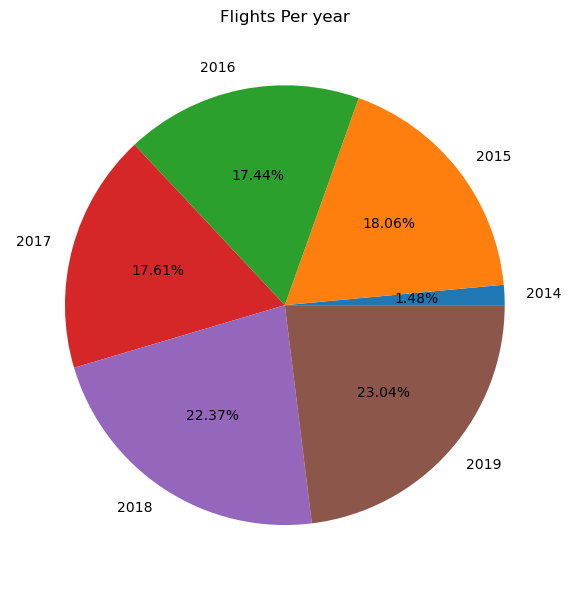

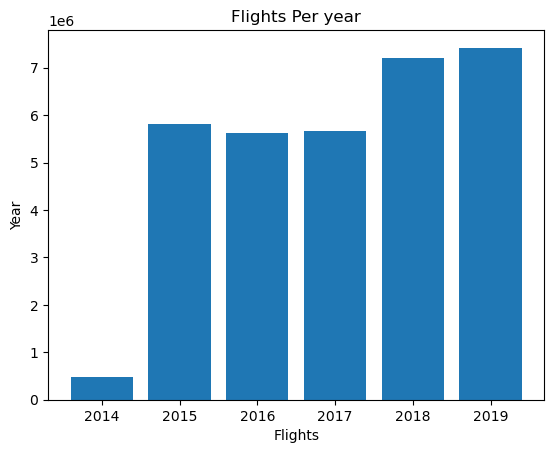

In [18]:
flights_per_year = df_1.groupby('year')['arr_flights'].sum()
print("Total Fligths Per Year \n")
print(flights_per_year.sort_index())

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(flights_per_year.values, labels = flights_per_year.index, autopct='%.2f%%')

ax.set_title('Flights Per year')
plt.tight_layout()

fig, ax = plt.subplots()
ax.bar(flights_per_year.index, flights_per_year.values)

ax.set_ylabel('Year')
ax.set_xlabel('Flights')
ax.set_title('Flights Per year')
plt.show()


##### <b> Tampilkan jumlah flights per month</b>

month
1     2519929.0
2     2317540.0
3     2716136.0
4     2623210.0
5     2715796.0
6     2748708.0
7     2836590.0
8     2814897.0
9     2570289.0
10    2690729.0
11    2561755.0
12    3101171.0
Name: arr_flights, dtype: float64


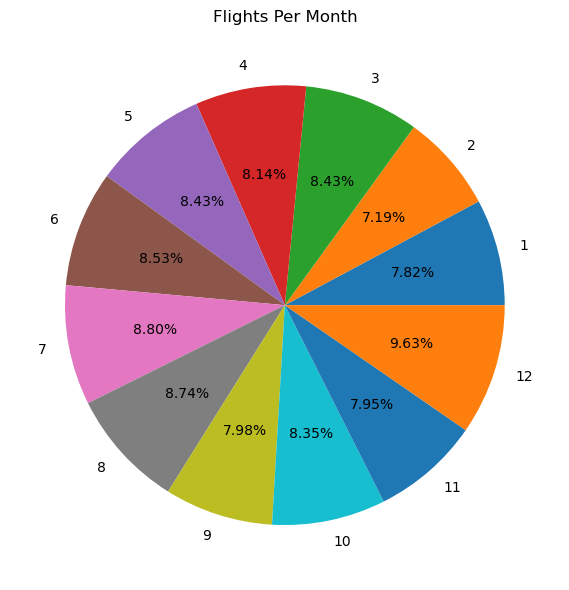

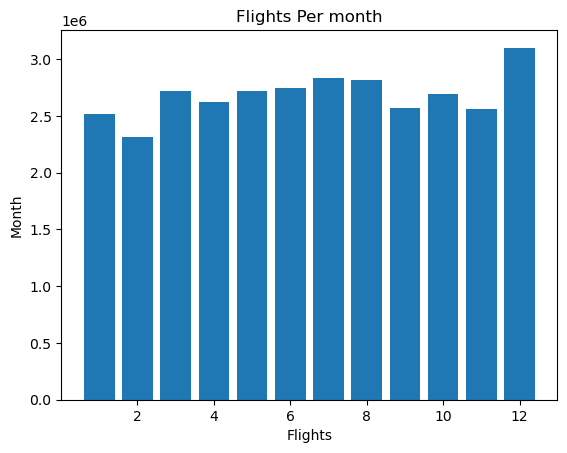

In [19]:
flights_per_month = df_1.groupby('month')['arr_flights'].sum()
print(flights_per_month.sort_index())
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(flights_per_month.values, labels = flights_per_month.index, autopct='%.2f%%')

ax.set_title('Flights Per Month')
plt.tight_layout()

fig, ax = plt.subplots()
ax.bar(flights_per_month.index, flights_per_month.values)

ax.set_ylabel('Month')
ax.set_xlabel('Flights')
ax.set_title('Flights Per month')
plt.show()

      

#### <b>Tampilkan percentage delay dan ontime seluruh dataset </b>

<Figure size 600x600 with 0 Axes>

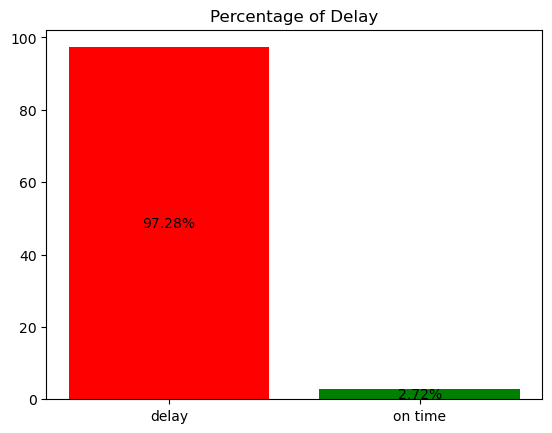

In [20]:
df_1['is_delayed'] = df_1['arr_del15'] > 0
delayed_percentage = df_1.is_delayed.value_counts(normalize=True)
label_of_delay = {0: "on time", 1: "delay"}
delay_index = delayed_percentage.index

plt.figure(figsize = (6,6))
fig, ax = plt.subplots()
ax.set_title("Percentage of Delay")
p = ax.bar(list(map(label_of_delay.get, delay_index)), [x * 100 for x in delayed_percentage.values],
       color=["red", 'green'])
ax.bar_label(p, label_type="center", 
            fmt="%.2f%%" )

plt.show()



#### <b> Translasi string pada carrier ke dalam bentuk integer </b>

In [21]:
encoder = LabelEncoder()
df_1['carrier_name'] = encoder.fit_transform(df_1['carrier_name'])
carrier_name = {index : label for index, label in enumerate(encoder.classes_)}
carrier_name

{0: 'AirTran Airways Corporation',
 1: 'Alaska Airlines Inc.',
 2: 'Allegiant Air',
 3: 'American Airlines Inc.',
 4: 'Delta Air Lines Inc.',
 5: 'Endeavor Air Inc.',
 6: 'Envoy Air',
 7: 'ExpressJet Airlines Inc.',
 8: 'ExpressJet Airlines LLC',
 9: 'Frontier Airlines Inc.',
 10: 'Hawaiian Airlines Inc.',
 11: 'JetBlue Airways',
 12: 'Mesa Airlines Inc.',
 13: 'PSA Airlines Inc.',
 14: 'Republic Airline',
 15: 'SkyWest Airlines Inc.',
 16: 'Southwest Airlines Co.',
 17: 'Spirit Air Lines',
 18: 'US Airways Inc.',
 19: 'United Air Lines Inc.',
 20: 'Virgin America'}

#### <b> Translasi string pada airport ke dalam bentuk integer </b>

In [22]:
df_1['airport'] = encoder.fit_transform(df_1['airport'])
airport = {index : label for index, label in enumerate(encoder.classes_)}
airport

{0: 'ABE',
 1: 'ABI',
 2: 'ABQ',
 3: 'ABR',
 4: 'ABY',
 5: 'ACK',
 6: 'ACT',
 7: 'ACV',
 8: 'ACY',
 9: 'ADK',
 10: 'ADQ',
 11: 'AEX',
 12: 'AGS',
 13: 'AKN',
 14: 'ALB',
 15: 'ALO',
 16: 'AMA',
 17: 'ANC',
 18: 'APN',
 19: 'ART',
 20: 'ASE',
 21: 'ATL',
 22: 'ATW',
 23: 'ATY',
 24: 'AUS',
 25: 'AVL',
 26: 'AVP',
 27: 'AZA',
 28: 'AZO',
 29: 'BDL',
 30: 'BET',
 31: 'BFF',
 32: 'BFL',
 33: 'BFM',
 34: 'BGM',
 35: 'BGR',
 36: 'BHM',
 37: 'BIL',
 38: 'BIS',
 39: 'BJI',
 40: 'BKG',
 41: 'BLI',
 42: 'BLV',
 43: 'BMI',
 44: 'BNA',
 45: 'BOI',
 46: 'BOS',
 47: 'BPT',
 48: 'BQK',
 49: 'BQN',
 50: 'BRD',
 51: 'BRO',
 52: 'BRW',
 53: 'BTM',
 54: 'BTR',
 55: 'BTV',
 56: 'BUF',
 57: 'BUR',
 58: 'BWI',
 59: 'BZN',
 60: 'CAE',
 61: 'CAK',
 62: 'CDC',
 63: 'CDV',
 64: 'CEC',
 65: 'CGI',
 66: 'CHA',
 67: 'CHO',
 68: 'CHS',
 69: 'CIC',
 70: 'CID',
 71: 'CIU',
 72: 'CKB',
 73: 'CLD',
 74: 'CLE',
 75: 'CLL',
 76: 'CLT',
 77: 'CMH',
 78: 'CMI',
 79: 'CMX',
 80: 'CNY',
 81: 'COD',
 82: 'COS',
 83: 'COU',
 8

In [23]:
df_1['airport_name'] = encoder.fit_transform(df_1['airport_name'])
airport_name = {index : label for index, label in enumerate(encoder.classes_)}
airport_name

{0: 'Aberdeen, SD: Aberdeen Regional',
 1: 'Abilene, TX: Abilene Regional',
 2: 'Adak Island, AK: Adak',
 3: 'Aguadilla, PR: Rafael Hernandez',
 4: 'Akron, OH: Akron-Canton Regional',
 5: 'Albany, GA: Southwest Georgia Regional',
 6: 'Albany, NY: Albany International',
 7: 'Albuquerque, NM: Albuquerque International Sunport',
 8: 'Alexandria, LA: Alexandria International',
 9: 'Allentown/Bethlehem/Easton, PA: Lehigh Valley International',
 10: 'Alpena, MI: Alpena County Regional',
 11: 'Amarillo, TX: Rick Husband Amarillo International',
 12: 'Anchorage, AK: Ted Stevens Anchorage International',
 13: 'Appleton, WI: Appleton International',
 14: 'Arcata/Eureka, CA: California Redwood Coast Humboldt County',
 15: 'Asheville, NC: Asheville Regional',
 16: 'Ashland, WV: Tri-State/Milton J. Ferguson Field',
 17: 'Aspen, CO: Aspen Pitkin County Sardy Field',
 18: 'Atlanta, GA: Hartsfield-Jackson Atlanta International',
 19: 'Atlantic City, NJ: Atlantic City International',
 20: 'Augusta, GA:

In [24]:
df_1['carrier'] = encoder.fit_transform(df_1['carrier'])
carrier = {index : label for index, label in enumerate(encoder.classes_)}
carrier

{0: '9E',
 1: 'AA',
 2: 'AS',
 3: 'B6',
 4: 'DL',
 5: 'EV',
 6: 'F9',
 7: 'FL',
 8: 'G4',
 9: 'HA',
 10: 'MQ',
 11: 'NK',
 12: 'OH',
 13: 'OO',
 14: 'UA',
 15: 'US',
 16: 'VX',
 17: 'WN',
 18: 'YV',
 19: 'YX'}

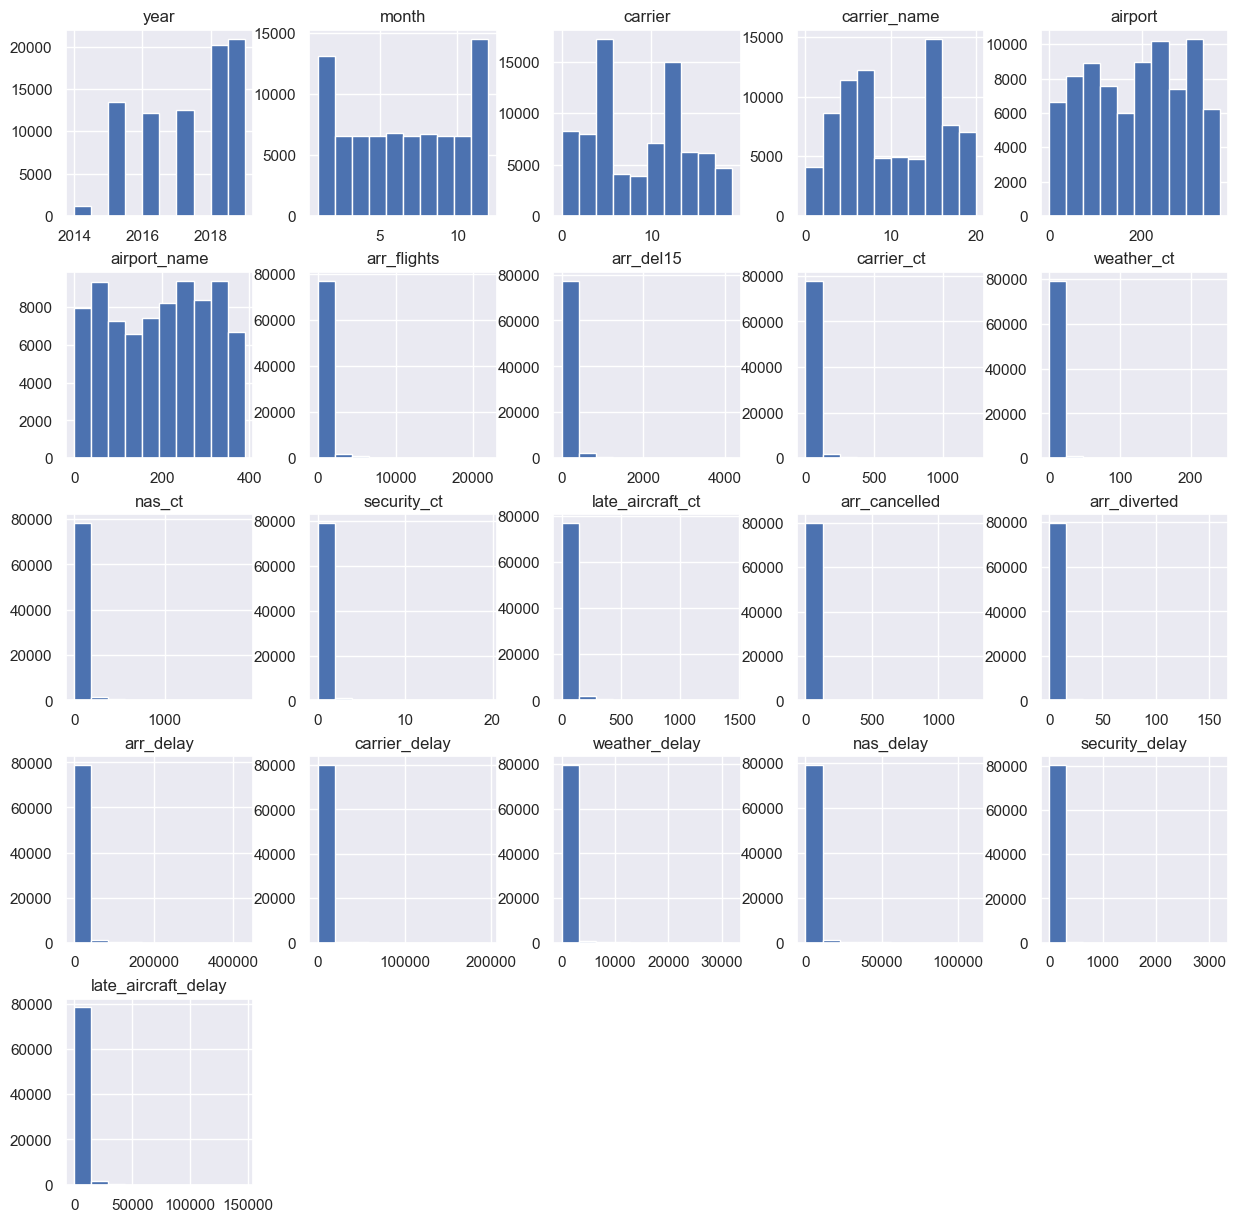

In [25]:
sns.set();
df_1.hist(figsize=(15,15));

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80494 entries, 0 to 80589
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 80494 non-null  int64  
 1   month                80494 non-null  int64  
 2   carrier              80494 non-null  int32  
 3   carrier_name         80494 non-null  int32  
 4   airport              80494 non-null  int32  
 5   airport_name         80494 non-null  int32  
 6   arr_flights          80494 non-null  float64
 7   arr_del15            80494 non-null  float64
 8   carrier_ct           80494 non-null  float64
 9   weather_ct           80494 non-null  float64
 10  nas_ct               80494 non-null  float64
 11  security_ct          80494 non-null  float64
 12  late_aircraft_ct     80494 non-null  float64
 13  arr_cancelled        80494 non-null  float64
 14  arr_diverted         80494 non-null  float64
 15  arr_delay            80494 non-null  floa

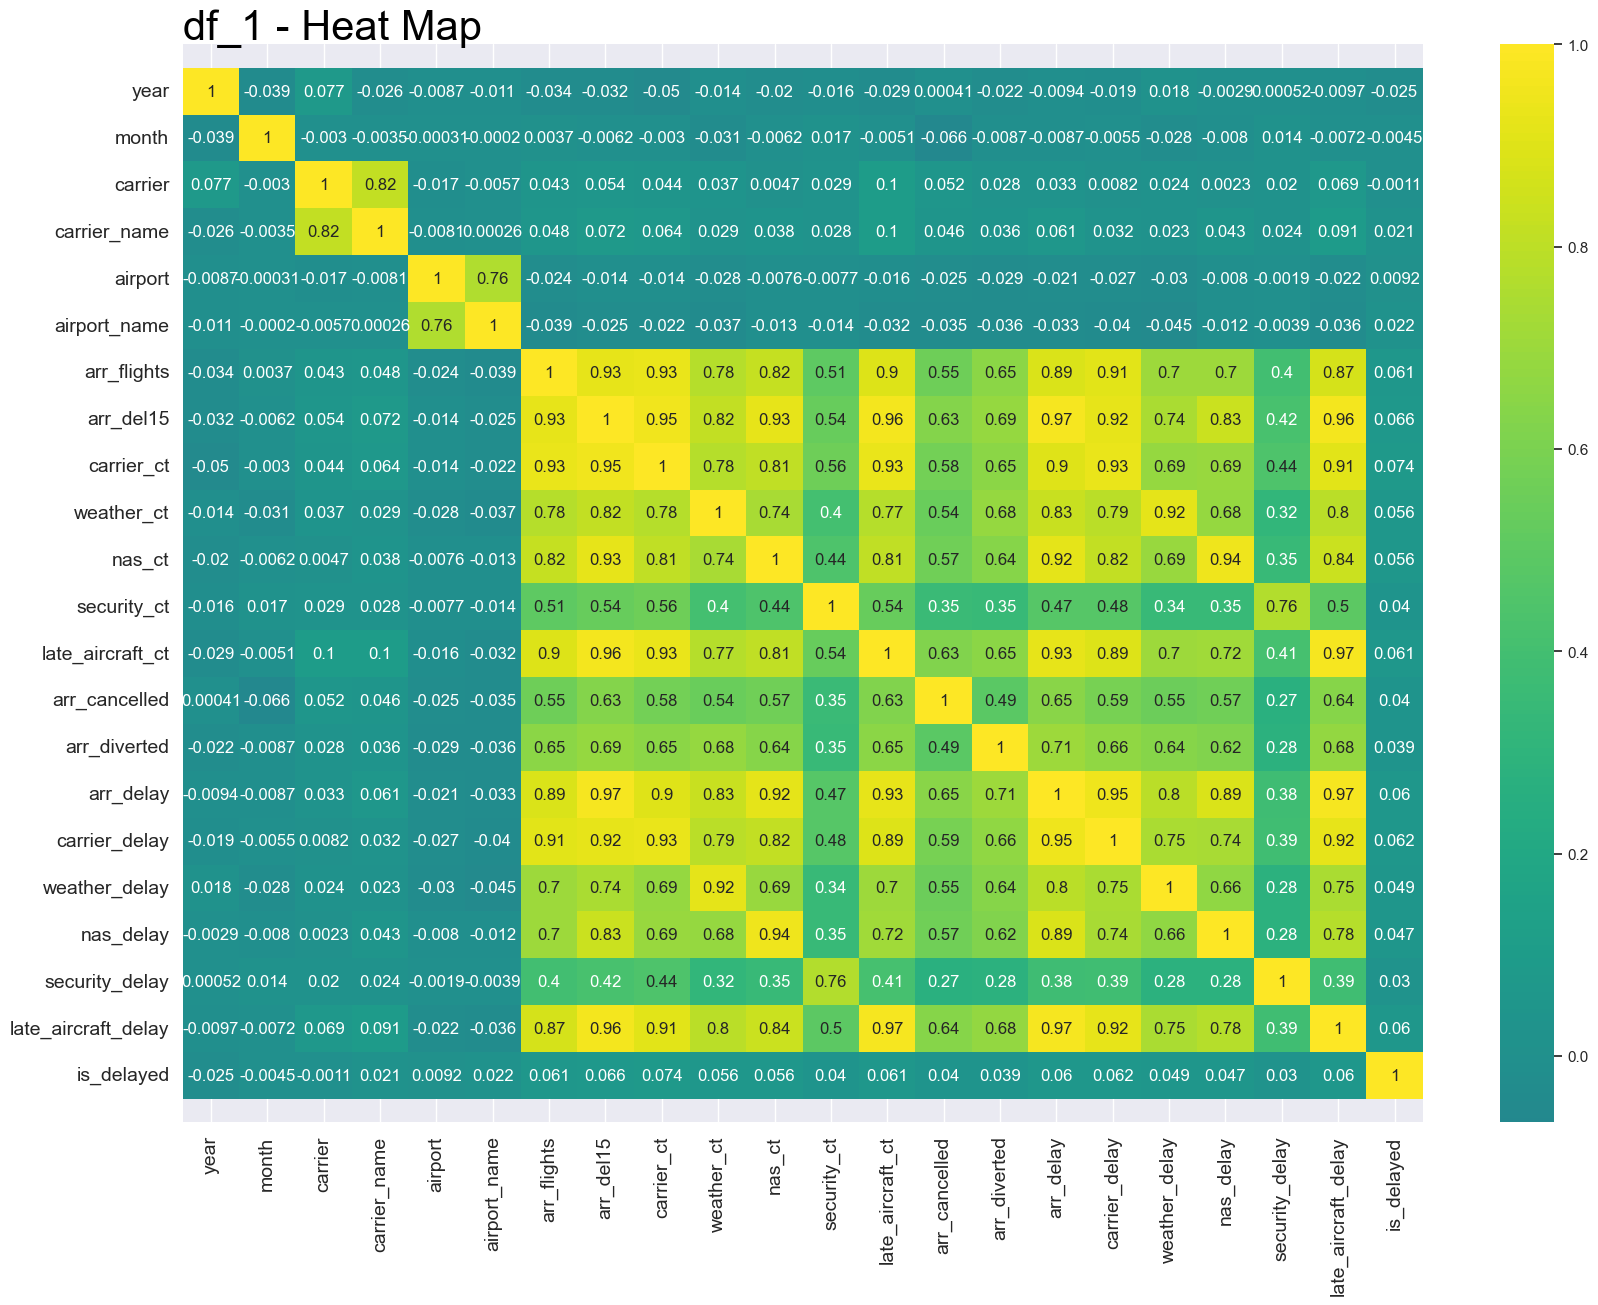

In [27]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_1.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df_1 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [28]:
# pembagian data uji dan latih. X adalah data data dengan kolom selain arr_del15 sedangkan Y adalah kolom arr_del15
X = df_1.drop('arr_del15', axis=1)
Y = df_1['arr_del15']

In [29]:
# Assuming X and Y are your feature matrix and target variable
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=33)

# Define the scoring metrics
scoring = {
    "r2": "r2",
    "mae": make_scorer(mean_absolute_error),
    "mse": make_scorer(mean_squared_error),
    "rmse": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))),
}

# Perform cross-validation
output_rfr = cross_validate(RandomForestRegressorModel, X, Y, cv=5, scoring=scoring)

# Calculate the average of each metric
avg_r2_rfr = np.mean(output_rfr["test_r2"])
avg_mae_rfr = np.mean(output_rfr["test_mae"])
avg_mse_rfr = np.mean(output_rfr["test_mse"])
avg_rmse_rfr = np.mean(output_rfr["test_rmse"])


# Print the average results
print("Average R2 Score:", avg_r2_rfr)
print("Average Mean Absolute Error (MAE):", avg_mae_rfr)
print("Average Mean Squared Error (MSE):", avg_mse_rfr)
print("Average Root Mean Squared Error (RMSE):", avg_rmse_rfr)


Average R2 Score: 0.9830015102164754
Average Mean Absolute Error (MAE): 10.05768267146399
Average Mean Squared Error (MSE): 585.0854200548629
Average Root Mean Squared Error (RMSE): 24.15041819183866


In [ ]:
linear_regression = LinearRegression()

# Define the scoring metrics
scoring = {
    "r2": "r2",
    "mae": make_scorer(mean_absolute_error),
    "mse": make_scorer(mean_squared_error),
    "rmse": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
}

# Perform cross-validation
output_lr = cross_validate(linear_regression, X, Y, cv=5, scoring=scoring)

# Calculate the average of each metric
avg_r2_lr = np.mean(output_lr["test_r2"])
avg_mae_lr = np.mean(output_lr["test_mae"])
avg_mse_lr = np.mean(output_lr["test_mse"])
avg_rmse_lr = np.mean(output_lr["test_rmse"])

# Print the average results
print("Average R2 Score:", avg_r2_lr)
print("Average Mean Absolute Error (MAE):", avg_mae_lr)
print("Average Mean Squared Error (MSE):", avg_mse_lr)
print("Average Root Mean Squared Error (RMSE):", avg_rmse_lr)

In [30]:
decision_tree = DecisionTreeRegressor()

# Define the scoring metrics
scoring = {
    "r2": "r2",
    "mae": make_scorer(mean_absolute_error),
    "mse": make_scorer(mean_squared_error),
    "rmse": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
}

# Perform cross-validation
output_dt = cross_validate(decision_tree, X, Y, cv=5, scoring=scoring)

# Calculate the average of each metric
avg_r2_dt = np.mean(output_dt["test_r2"])
avg_mae_dt = np.mean(output_dt["test_mae"])
avg_mse_dt = np.mean(output_dt["test_mse"])
avg_rmse_dt = np.mean(output_dt["test_rmse"])

# Print the average results
print("Average R2 Score:", avg_r2_dt)
print("Average Mean Absolute Error (MAE):", avg_mae_dt)
print("Average Mean Squared Error (MSE):", avg_mse_dt)
print("Average Root Mean Squared Error (RMSE):", avg_rmse_dt)

Average R2 Score: 0.9917738597049095
Average Mean Absolute Error (MAE): 4.260670033722807
Average Mean Squared Error (MSE): 286.4418737858111
Average Root Mean Squared Error (RMSE): 16.80908342499476


In [31]:
extra_trees = ExtraTreesRegressor()

# Define the scoring metrics
scoring = {
    "r2": "r2",
    "mae": make_scorer(mean_absolute_error),
    "mse": make_scorer(mean_squared_error),
    "rmse": make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)))
}

# Perform cross-validation
output_et = cross_validate(extra_trees, X, Y, cv=5, scoring=scoring)

# Calculate the average of each metric
avg_r2_et = np.mean(output_et["test_r2"])
avg_mae_et = np.mean(output_et["test_mae"])
avg_mse_et = np.mean(output_et["test_mse"])
avg_rmse_et = np.mean(output_et["test_rmse"])

# Print the average results
print("Average R2 Score:", avg_r2_et)
print("Average Mean Absolute Error (MAE):", avg_mae_et)
print("Average Mean Squared Error (MSE):", avg_mse_et)
print("Average Root Mean Squared Error (RMSE):", avg_rmse_et)

In [ ]:

# Define the models and their corresponding MAE values
models = ['Extra Trees', 'Random Forest', 'Linear Regression', 'Decision Tree']
mae_values = [avg_mae_et, avg_mae_rfr, avg_mae_lr, avg_mae_dt]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) for Different Regression Models')
plt.ylim(0, max(mae_values) + 1)  # Set the y-axis limit for better visualization

# Display the values on top of the bars
for i, value in enumerate(mae_values):
    plt.text(i, value + 0.1, f'{value:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

{'fit_time': array([4.13205409, 4.46101761]), 'score_time': array([0.16331458, 0.2269969 ]), 'test_r2': array([0.99542202, 0.99797567]), 'test_neg_mean_squared_error': array([-0.00111915, -0.00048985])}


In [ ]:
# Define the models and their corresponding R2 values
models = ['Extra Trees', 'Random Forest', 'Linear Regression', 'Decision Tree']
r2_values = [avg_r2_et, avg_r2_rfr, avg_r2_lr, avg_r2_dt]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of R-squared (R2) Score for Different Regression Models')
plt.ylim(0, 1.1)  # R2 values range from 0 to 1

# Display the values on top of the bars
for i, value in enumerate(r2_values):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:


# Define the models and their corresponding MSE values
models = ['Extra Trees', 'Random Forest', 'Linear Regression', 'Decision Tree']
mse_values = [avg_mse_et, avg_mse_rfr, avg_mse_lr, avg_mse_dt]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) for Different Regression Models')
plt.ylim(0, max(mse_values) + 1)  # Set the y-axis limit for better visualization

# Display the values on top of the bars
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.1, f'{value:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
# Define the models and their corresponding RMSE values
models = ['Extra Trees', 'Random Forest', 'Linear Regression', 'Decision Tree']
rmse_values = [avg_rmse_et, avg_rmse_rfr, avg_rmse_lr, avg_rmse_dt]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of Root Mean Squared Error (RMSE) for Different Regression Models')
plt.ylim(0, max(rmse_values) + 1)  # Set the y-axis limit for better visualization

# Display the values on top of the bars
for i, value in enumerate(rmse_values):
    plt.text(i, value + 0.1, f'{value:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()